# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised

*   Clustering
*   Sentiment Analysis


##### **Contribution**    - Individual
##### **By-** Sambit Pani

# **Project Summary -**

The project is based on the emerging popular food delivery online platform, Zomato. Here I got two datasets. One is restraunt and another is review.

I have to perform data analysis based on business perspective. So I have done data cleaning and preprocessing to make the data suitable for our analysis.\
Then I perform EDA on both the datasets to get more details about the data and the features it contained.\
Now I applied K-means clustering to cluster the data into similar groups. Also i have undergone sentiment analysis of the reviews and visualize them with LDA visualizer.
I also compared with supervised methods to get the insights. Finally I come to conclude my project.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis. Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install pandas==2.0.3

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
meta_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone Project Un-Supervised ML/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone Project Un-Supervised ML/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Dataset First Look
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Restaurant names and Metadata observations : ",meta_df.shape)
print("Restaurant reviews : ",review_df.shape)

Restaurant names and Metadata observations :  (105, 6)
Restaurant reviews :  (10000, 7)


### Dataset Information

In [ ]:
# Dataset Info
meta_df.info()
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(meta_df.duplicated().sum())
print(review_df.duplicated().sum())

0
36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(meta_df.isnull().sum())
print(review_df.isnull().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


In [ ]:
# Visualizing the missing values
meta_df[meta_df.isna().any(axis=1)]

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,"1,000",NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr..."
28,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


In [ ]:
review_df[review_df.isna().any(axis=1)]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


### What did you know about your dataset?

Restaurant DataSet(meta_df):-

*   It contains 105 rows and 6 features.
*   Collection and Timing features has null values.
*   No duplicated Values.
*   Feature cost and timmings are of object datatype. \

Review Dataset(review_df):-
*   It contains 10000 rows and 7 features.
*   All features have null values except picture and restaurant
*   36 duplicated rows.
*   Rating and Time are of object datatype.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(meta_df.columns)
print(review_df.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
# Dataset Describe
meta_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

#### **Restaurant Dataset:**
Name : Name of Restaurants\
Links : URL Links of Restaurants\
Cost : Per person estimated Cost of dining\
Collection : Tagging of Restaurants w.r.t. Zomato categories\
Cuisines : Cuisines served by Restaurants\
Timings : Restaurant Timings
#### **Review Dataset:**
Restaurant : Name of the Restaurant\
Reviewer : Name of the Reviewer\
Review : Review Text\
Rating : Rating Provided by Reviewer\
MetaData : Reviewer Metadata - No. of Reviews and followers\
Time: Date and Time of Review\
Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Meta dataset:\n",meta_df.nunique())
print("Review dataset:\n",review_df.nunique())

Meta dataset:
 Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64
Review dataset:
 Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
meta_df['Cost'] = meta_df['Cost'].str.replace(',','').astype('int64')

In [ ]:
# removing null values
review_df = review_df.dropna()

In [ ]:
#converting rating to float
review_df.drop(review_df[(review_df['Rating']=='Like')].index,inplace=True)
review_df['Rating']= review_df['Rating'].astype('float64')
review_df.shape

(9954, 7)

In [ ]:
# Extracting reviewer datails from metadata
review_df['Reviewer_Total_Review']=review_df['Metadata'].str.split(',').str[0]
review_df['Reviewer_Followers']= review_df['Metadata'].str.split(',').str[1]
review_df['Reviewer_Total_Review'] = pd.to_numeric(review_df['Reviewer_Total_Review'].str.split(' ').str[0])
review_df['Reviewer_Followers'] = pd.to_numeric(review_df['Reviewer_Followers'].str.split(' ').str[1])

In [ ]:
review_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0


In [ ]:
#Extracting review time,year,month and Hour for analysis
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Review_Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Review_Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Review_Hour'] = pd.DatetimeIndex(review_df['Time']).hour

### What all manipulations have you done and insights you found?

Restaurant Data
* I have only changed the cost feature datatype from object to int.\

Review Data
* As very less number of missing values are present in the review data. So i decide to remove them.
* I have only changed the rating feature datatype from object to float.
* Extracted followers and reviews from metadata.
* Extracted Time,Year,Month and Hour of review created.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Restaurant

#### Chart - 1

<Axes: xlabel='Cost', ylabel='Name'>

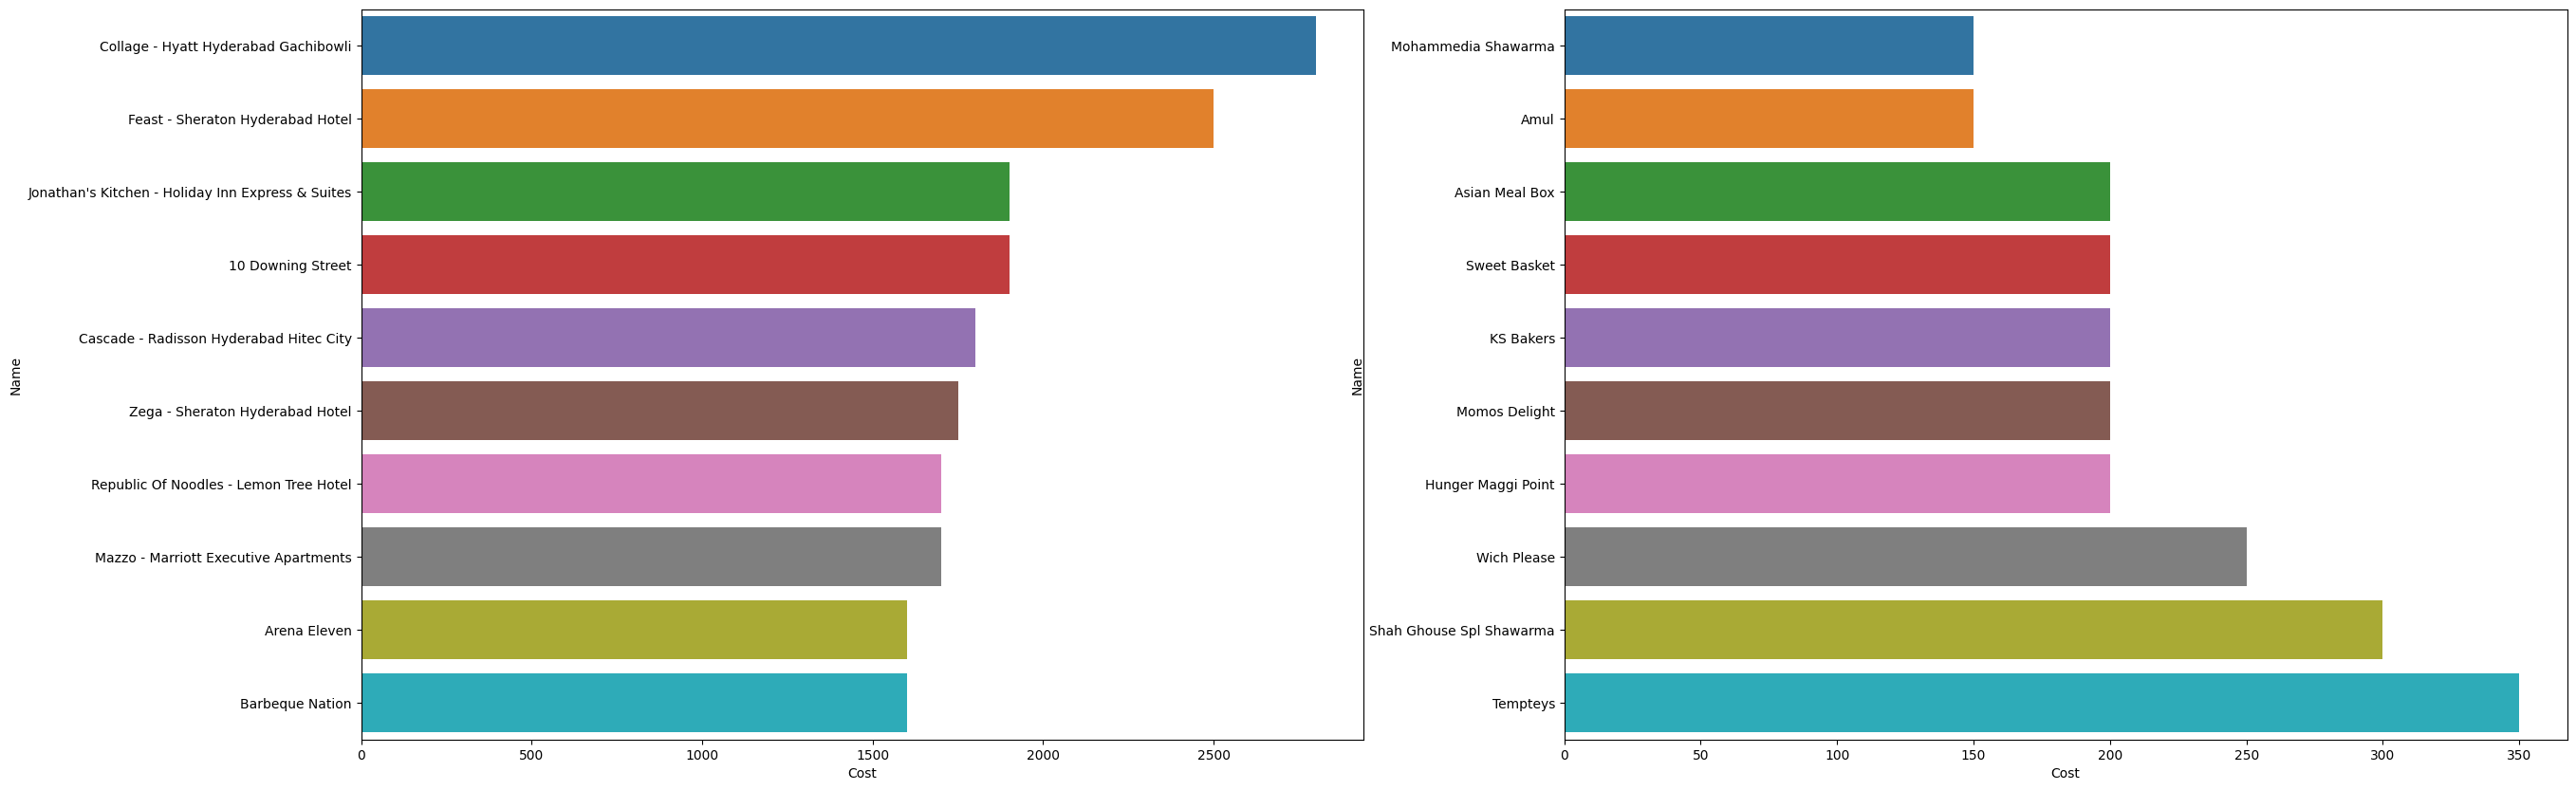

In [ ]:
# Chart - 1 visualization code
#Costlier and affordable restaurants
fig, axes = plt.subplots(1,2,figsize=(30,10))
sns.barplot(data = meta_df[['Name','Cost']].sort_values(by='Cost',ascending=False).head(10), x = 'Cost',y = 'Name',ax=axes[0])
sns.barplot(data = meta_df[['Name','Cost']].sort_values(by='Cost',ascending=True).head(10), x = 'Cost',y = 'Name',ax=axes[1])


##### 1. Why did you pick the specific chart?

To check the costlier restaurants.

##### 2. What is/are the insight(s) found from the chart?

Collage - Hyatt Hyderabad Gachibowli	is the costlier among all restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can suggest this restaurant to customer more costlier orders.

#### Chart - 2

<Axes: xlabel='Name'>

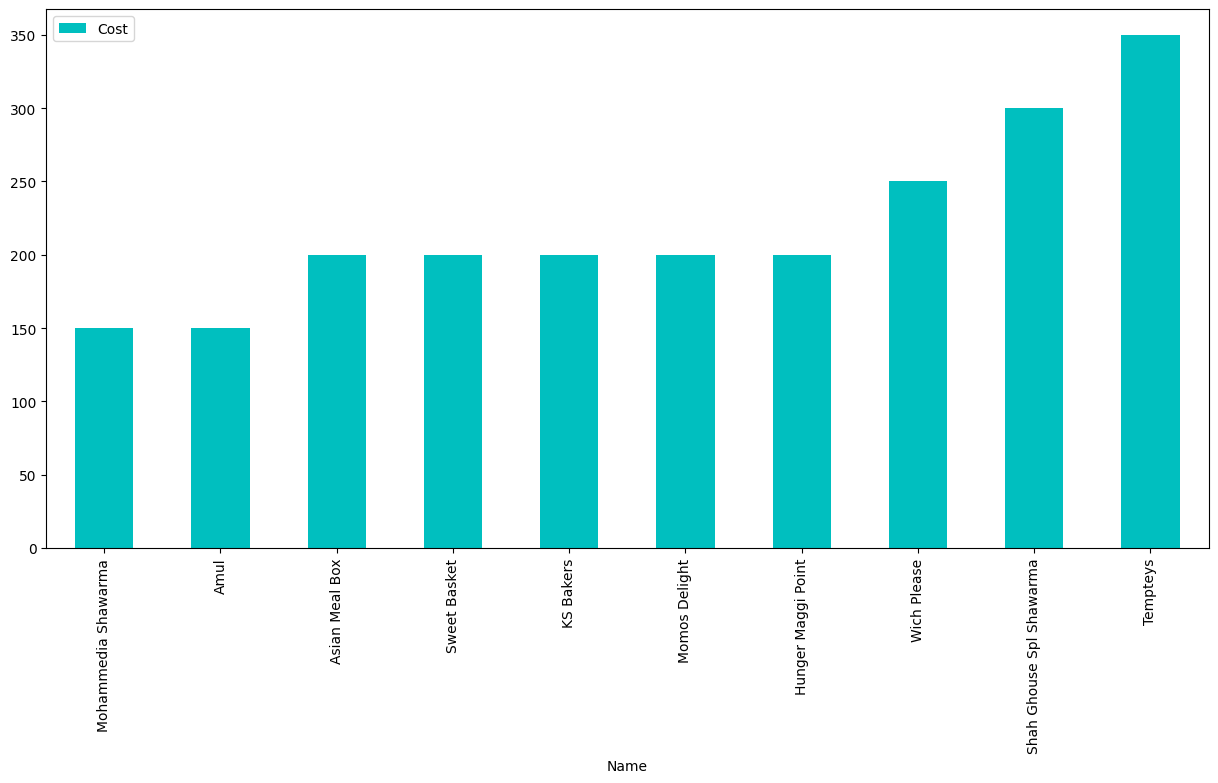

In [ ]:
# Chart - 2 visualization code
# Most affordable restaurants
meta_df[['Name','Cost']].sort_values(by='Cost',ascending=True).head(10).plot(kind='bar',x='Name',color='c',figsize=(15,7))

##### 1. Why did you pick the specific chart?

To get the cheapest restaurants.

##### 2. What is/are the insight(s) found from the chart?

Mohammedia Shawarma and Amul are the cheapest restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Just to check which restaurants are the cheapest ones.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
collection_list = meta_df['Collections'].dropna().apply(lambda x: [collection.strip() for collection in x.split(', ')])

In [ ]:
collection_top_dict = {}
for x in collection_list:
  for collection in x:
    if collection in collection_top_dict:
      collection_top_dict[collection] += 1
    else :
      collection_top_dict[collection] = 1
collection_top_df = pd.DataFrame(((k,vals) for k,vals in collection_top_dict.items()),columns=['Collection','Restaurant count']).sort_values(by= 'Restaurant count' ,ascending=False)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

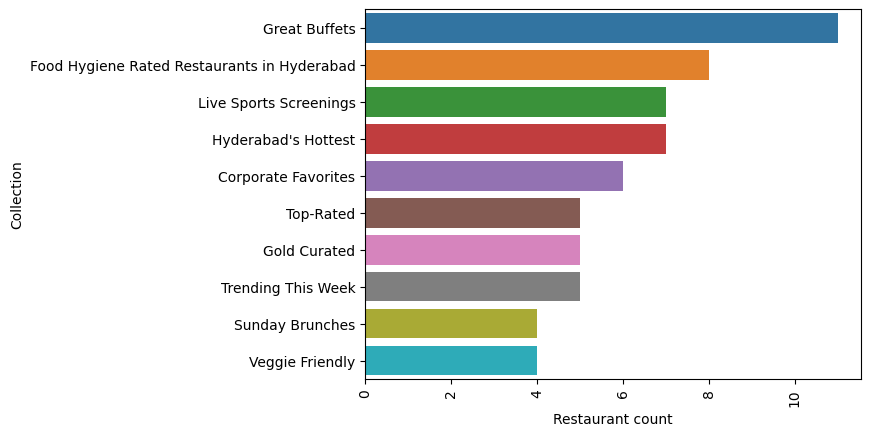

In [ ]:
# collection_top_df.head(10)[['Collection','Restaurant count']].plot(kind='bar')
sns.barplot(y = collection_top_df['Collection'].head(10), x = collection_top_df['Restaurant count'].head(10))
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

It will show the best taggings of restaurants as per zomato categories.

##### 2. What is/are the insight(s) found from the chart?

Great Buffets is mostly used tag.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Just checking the most tagged collections.

#### Chart - 4

In [ ]:
# splitting all cuisines to list
cuisine_list = meta_df['Cuisines'].str.split(', ').apply(lambda x : [word for word in x] )


In [ ]:
cuisine_top_dict = {}
for x in cuisine_list:
  for cuisine in x:
    if cuisine in cuisine_top_dict:
      cuisine_top_dict[cuisine] += 1
    else :
      cuisine_top_dict[cuisine] = 1
cuisine_top_df = pd.DataFrame(((k,vals) for k,vals in cuisine_top_dict.items()),columns=['Cuisine','Restaurant count']).sort_values(by= 'Restaurant count' ,ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'Continental'),
  Text(3, 0, 'Biryani'),
  Text(4, 0, 'Fast Food'),
  Text(5, 0, 'Asian'),
  Text(6, 0, 'Italian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'South Indian'),
  Text(9, 0, 'Bakery')])

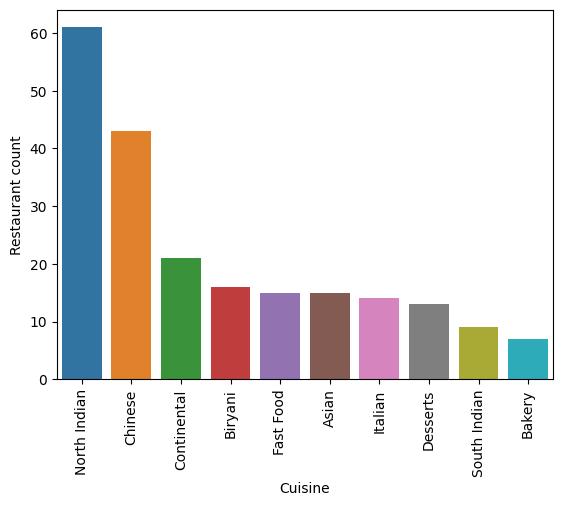

In [ ]:
# Chart - 4 visualization code
sns.barplot(x = cuisine_top_df['Cuisine'], y = cuisine_top_df['Restaurant count'])
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

It is showing different cuisines available in restaurants.

##### 2. What is/are the insight(s) found from the chart?

North Indian Restaurants are common. As most outsiders belong to North India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see damand of North Indian food and Chinese food are more. So we can target these members.

###**Reviews**

#### Chart - 5

<Axes: xlabel='Reviewer'>

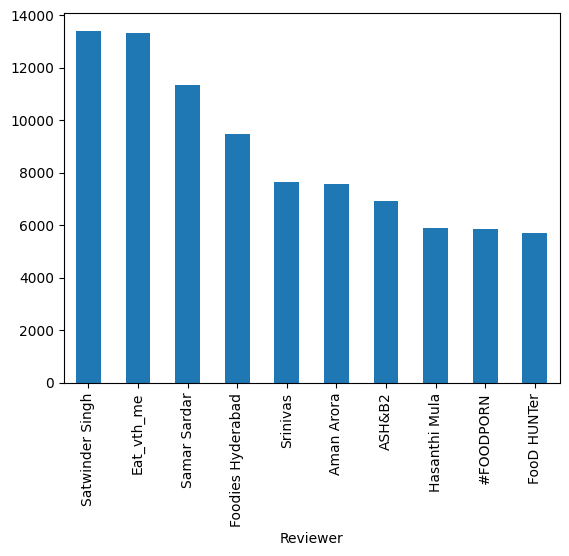

In [ ]:
# Chart - 5 visualization code
review_df.groupby('Reviewer')['Reviewer_Followers'].max().sort_values(ascending=False).head(10).plot(kind='bar')

##### 1. Why did you pick the specific chart?

These people are the most followed reviewers. To know whose reviews are going to impact more crowd.

##### 2. What is/are the insight(s) found from the chart?

It has been found that Satwinder Singh, Eat_with_me are the two most followed reviewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If we need some type of advertisement. We can choose them.

#### Chart - 6

<Axes: xlabel='Reviewer'>

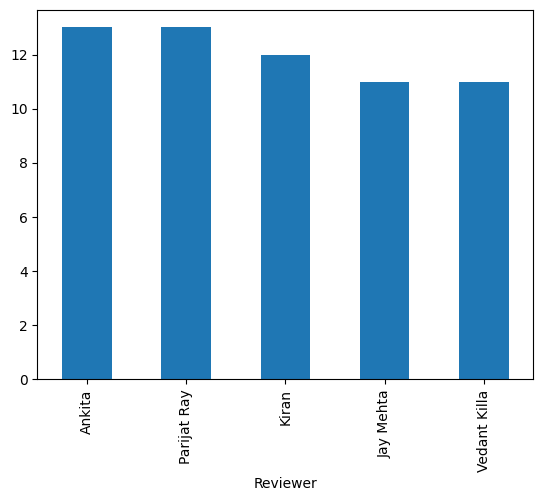

In [ ]:
# Chart - 6 visualization code
review_df['Reviewer'].value_counts().head(5).plot(kind='bar')

##### 1. Why did you pick the specific chart?

To know the active reviewers.

##### 2. What is/are the insight(s) found from the chart?

It has been found that Ankita,Parijat and Kiran are top three reviewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can appoint them to review multiple restaurants. Since they are the most reviewers it could be the thing that they like.

#### Chart - 7

<Axes: xlabel='Reviewer'>

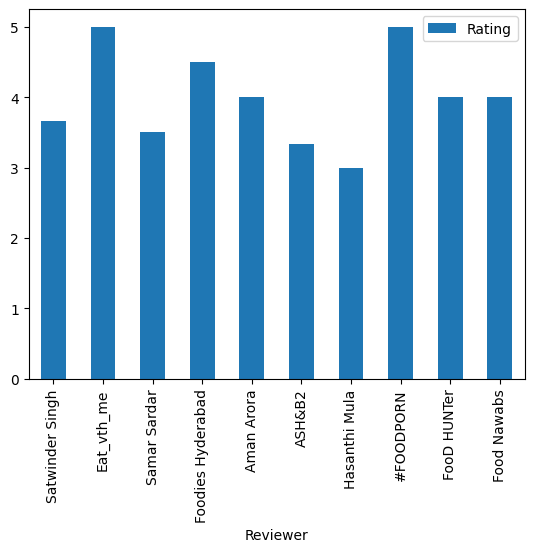

In [ ]:
# Chart - 7 visualization code
# Top followers given average ratings chart
review_df.groupby('Reviewer')[['Rating','Reviewer_Followers']].mean().sort_values(by=['Reviewer_Followers'],ascending=False).drop(['Reviewer_Followers'],axis=1).head(10).plot(kind='bar')

##### 1. Why did you pick the specific chart?

It is important to know the average ratings of most followed reviewers for getting their respective biases.

##### 2. What is/are the insight(s) found from the chart?

Here eat_vth_me and foodporn have given 5 ratings on average. Either the visited the best restaurants or they are always giving 5 ratings to all restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is useful during senstiment analysis.

#### Chart - 8

In [ ]:
type(review_df['Review_Month'].value_counts())

pandas.core.series.Series

<Axes: xlabel='Review_Month'>

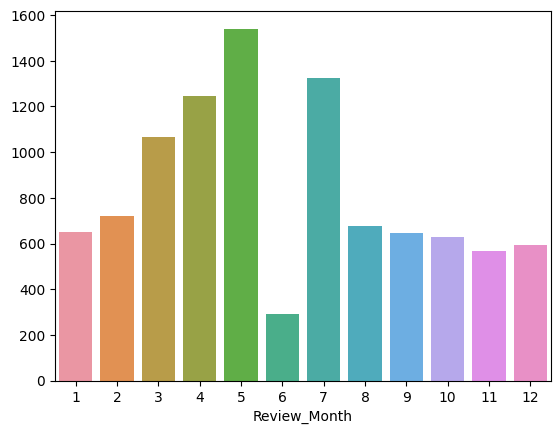

In [ ]:
# Chart - 8 visualization code
# .plot(kind='bar')
sns.barplot(x=review_df['Review_Month'].value_counts().index,y=review_df['Review_Month'].value_counts().values)

##### 1. Why did you pick the specific chart?

To get the idea of most engagged period for restaurants.

##### 2. What is/are the insight(s) found from the chart?

Feb to Aug there is very active period for restaurants except June.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In these time zomato should hire more delivery persons and give promotional codes in less active periods.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


(-0.5, 1399.5, 1399.5, -0.5)

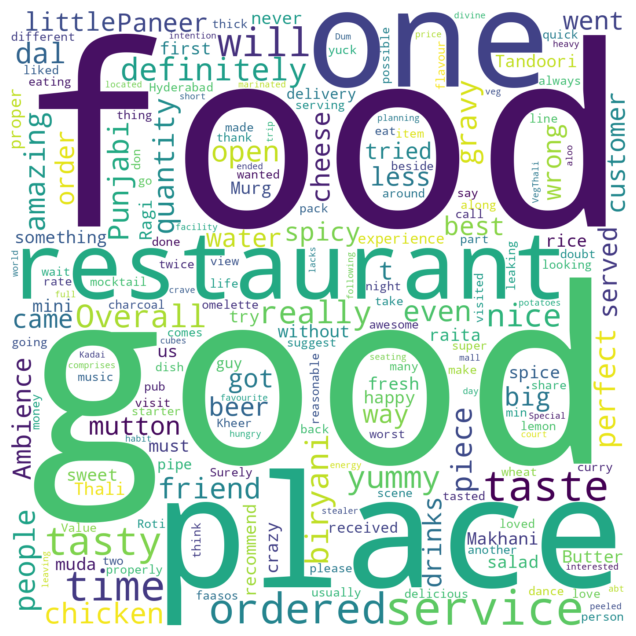

In [ ]:
# crating wordcloud
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Heatmap of reviwe_df
meta = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta.merge(review_df, on = 'Restaurant')
merged.shape


(9954, 17)

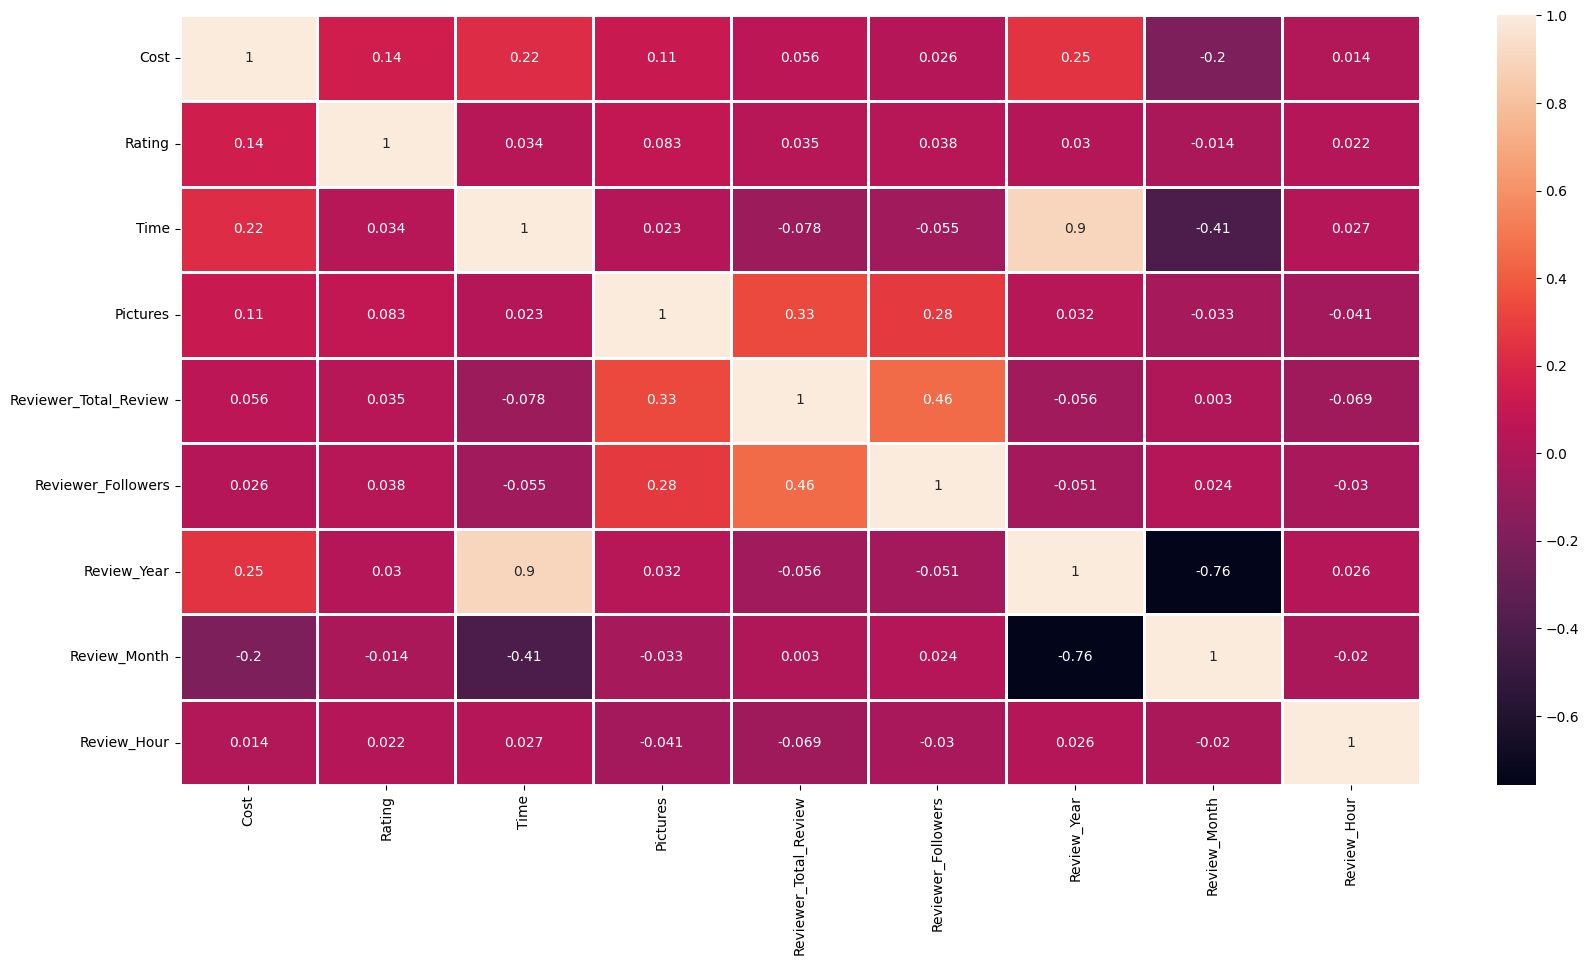

In [ ]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged[merged.describe().columns].corr(),ax = ax, annot=True, cmap = 'rocket', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

To check the correlation between all numeric variable.

##### 2. What is/are the insight(s) found from the chart?

There is very less number of years like 2018 and 2019 and very low data for the year 2016 and 2017. So the correlation cant be hlpful.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* High rated restaurants are more costly.
* Most followed reviewer rated restaurants has no effect over rating of that restaurant.
* Restaurants that offer a more variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : No correlation between rating and cost.\
Alternate Hypothesis : There is a correlation between them.\
Test : Simple Linear Regression analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as sm
model = sm.ols(formula='Rating ~ Cost', data= merged).fit()
p_value = model.pvalues[1]
if p_value < 0.05 :
  print('Null Hypothesis is rejected')
else:
  print('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

I have done simple regression test.

##### Why did you choose the specific statistical test?

Here the cost and rating are continuous values. So i prefer this test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : The number of followers a reviewer has has no effect on the rating of a restaurant.
Alternate Hypothesis : There is a positive relation between them.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as sm
model = sm.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()
p_value = model.pvalues[1]
if p_value < 0.05 :
  print('Null Hypothesis is rejected')
else:
  print('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

Same as hypothesis 1, simple rgression is used.

##### Why did you choose the specific statistical test?

As both rating and follower number are continuous variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Restaurants cuisines has no relation with the rating.\
Alternate Hypothesis : There is a relation between them.\
Test : Chi2

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])
chi2, p, dof, expected = chi2_contingency(ct)
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Applied chi2 contingency to get the p-value.

##### Why did you choose the specific statistical test?

As there is two categorical variables so i decided to go with chi squared.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#Checking the mean rating given by all to impute them in missing values of collection
round(collection_top_df['Restaurant count'].mean(),0)

3.0

In [ ]:
collection_top_df[collection_top_df['Restaurant count']==3]['Collection'].tolist()

['Barbecue & Grill', 'Happy Hours', 'Gigs and Events']

In [ ]:
mean_collection = ", ".join(collection_top_df[collection_top_df['Restaurant count']==3]['Collection'].tolist())
meta_df['Collections'].fillna(mean_collection,inplace=True)
meta_df.dropna(inplace=True)

In [ ]:
review_df['Reviewer_Followers'].fillna(0,inplace=True)

In [ ]:
print(meta_df.isna().sum())
print(review_df.isna().sum())

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64
Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64


In [ ]:
print(meta_df.shape)
print(review_df.shape)

(104, 6)
(9954, 12)


#### What all missing value imputation techniques have you used and why did you use those techniques?

* I have imputed mean values of collection i.e. 3 which is 'Barbecue & Grill', 'Happy Hours', 'Gigs and Events' in all collection missing values.
* I have imputed 0 where there is nan values in number of followers.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

As data is very less will not do outlier detection.

### 3. Categorical Encoding

In [ ]:
meta_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [ ]:
# Encode your categorical columns
cluster_dummy = meta_df[['Restaurant','Cuisines']]
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
cluster_dummy = cluster_dummy.explode('Cuisines')
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [ ]:
meta_df['Total_Cuisine_Count'] = meta_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})

In [ ]:
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
meta_df = meta_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
meta_df.head(1)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28


In [ ]:
cluster_dummy = meta_df[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')

In [ ]:
cluster_dummy.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.28,6,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have done one hot encoding on cuisines column.\
Kept average rating and Cost as they are numerical variables.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
import contractions
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Remove Stopwords
sw = stopwords.words('english')
def delete_stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text)

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

#### 8. Text Normalization

In [ ]:
# Normalizing Text Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I have done lemmatization technique as it is good way to reduce words whcih are used in different ways can be converted into its root words.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

##### Which text vectorization technique have you used and why?

I have used TFIDF. As it is better in some cases than Countvector.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
meta_df = meta_df.drop(columns = ['Links'], axis = 1)

In [ ]:
cluster_dummy.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.28,6,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Sentiment_df which is previous post processing output of review_df.
# For ratings above average we take as 1 and below average 0.
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

I will take all the features forward.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
from scipy.stats import skew
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(cluster_dummy[['Cost']]))
print(z)
cluster_dummy=cluster_dummy[(z<3).all(axis=1)]
cluster_dummy.shape

        Cost
0   0.141752
1   0.141752
2   0.846522
3   0.141752
4   0.648867
..       ...
94  0.932372
95  0.537062
96  1.735968
97  0.932372
98  0.253557

[99 rows x 1 columns]


(97, 48)

In [ ]:
# Transform Your data
symmetric_feature=[]
non_symmetric_feature=[]
for i in meta_df.describe().columns:
  if abs(meta_df[i].mean()-meta_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Cuisine_Count', 'Average_Rating']
Skew Symmetric Distributed Features : - ['Cost']


In [ ]:
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

I have applied log transformation in Cost as it is positively skewed.

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling your data
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

Here i have used standard scaler as its good for normally distributed data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, Due to more number of features model could be overfiiting and lower generalized. So reduction of features is important.

In [ ]:
scaled_df.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,0.189286,1.337051,2.514674,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaled_df.set_index(['Restaurant'],inplace=True)

In [ ]:
# DImensionality Reduction (If needed)
features = scaled_df.columns
pca = PCA()
pca.fit(scaled_df[features])

PCA()

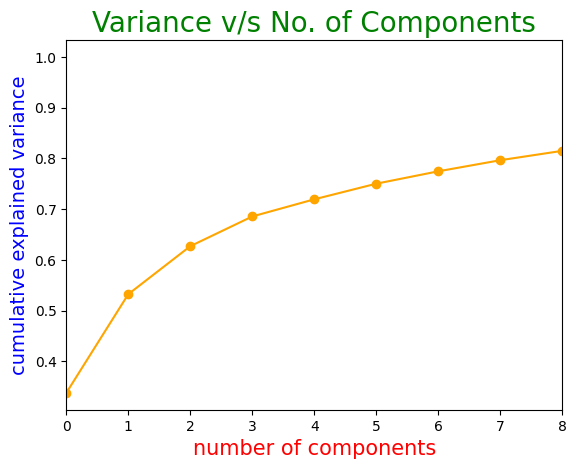

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_df[features])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.33758184 0.19460611 0.09467712]
Cumulative variance explained by 3 principal components: 62.69%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA is a common type of DR method. It is used to reduce the dimensionality to 3 as per the elbow curve.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = X_tfidf # I have created this during vectorization
y = sentiment_df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7963, 17327)
Number transactions y_train dataset:  (7963,)
Number transactions X_test dataset:  (1991, 17327)
Number transactions y_test dataset:  (1991,)


##### What data splitting ratio have you used and why?

Since data is 10k approx i used 80:20.

### 9. Handling Imbalanced Dataset

In [ ]:
sentiment_df.Sentiment.value_counts(normalize = True).mul(100).round(2)

Sentiment
1    62.97
0    37.03
Name: proportion, dtype: float64

##### Do you think the dataset is imbalanced? Explain Why.

I think its good to go. As imbalance is less.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

#### K Means Clustering

In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

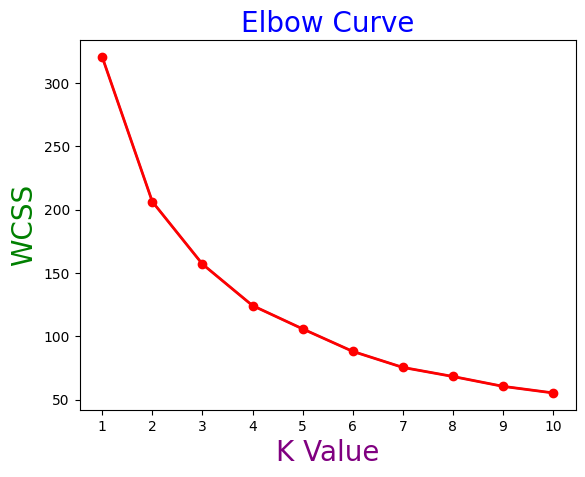

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.29515510878062284
For n_clusters = 3 average silhouette_score is : 0.2941937981087627
For n_clusters = 4 average silhouette_score is : 0.31055516701918606
For n_clusters = 5 average silhouette_score is : 0.3079513098962267
For n_clusters = 6 average silhouette_score is : 0.32235373383788424
For n_clusters = 7 average silhouette_score is : 0.3193480506515209
For n_clusters = 8 average silhouette_score is : 0.31291091138965493
For n_clusters = 9 average silhouette_score is : 0.29777248991253996


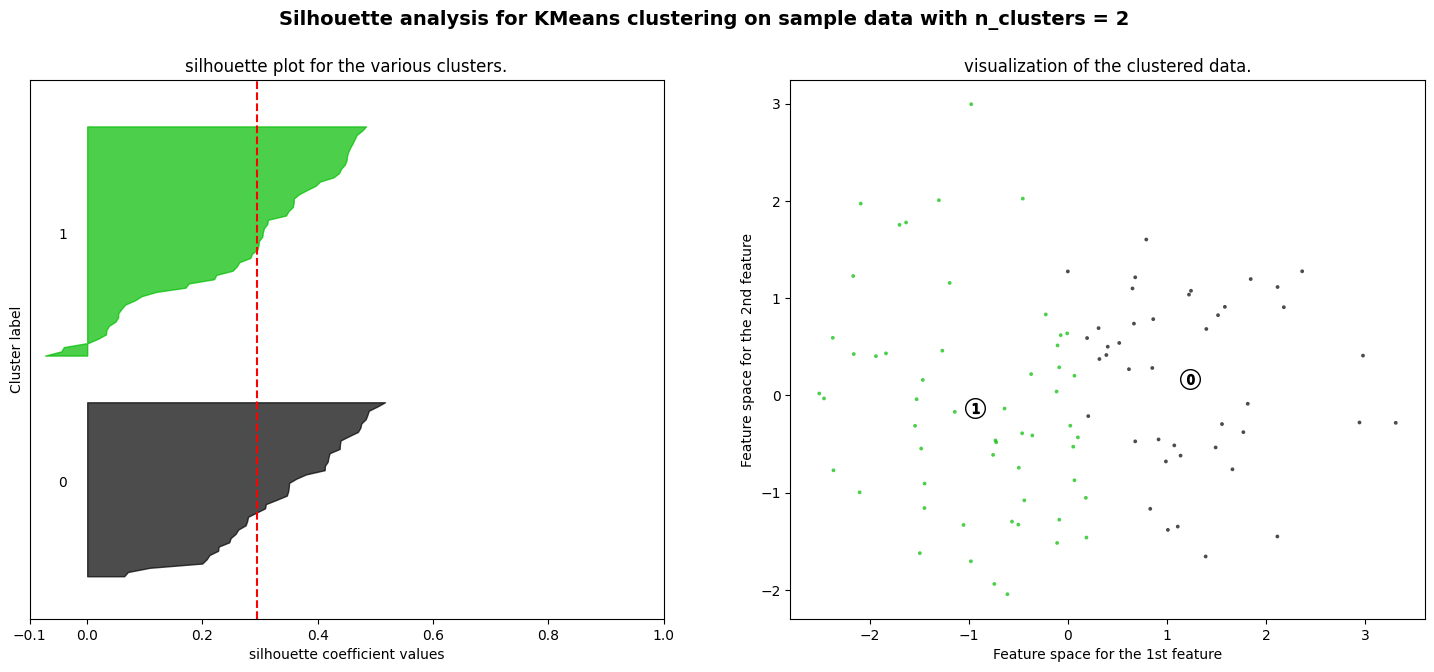

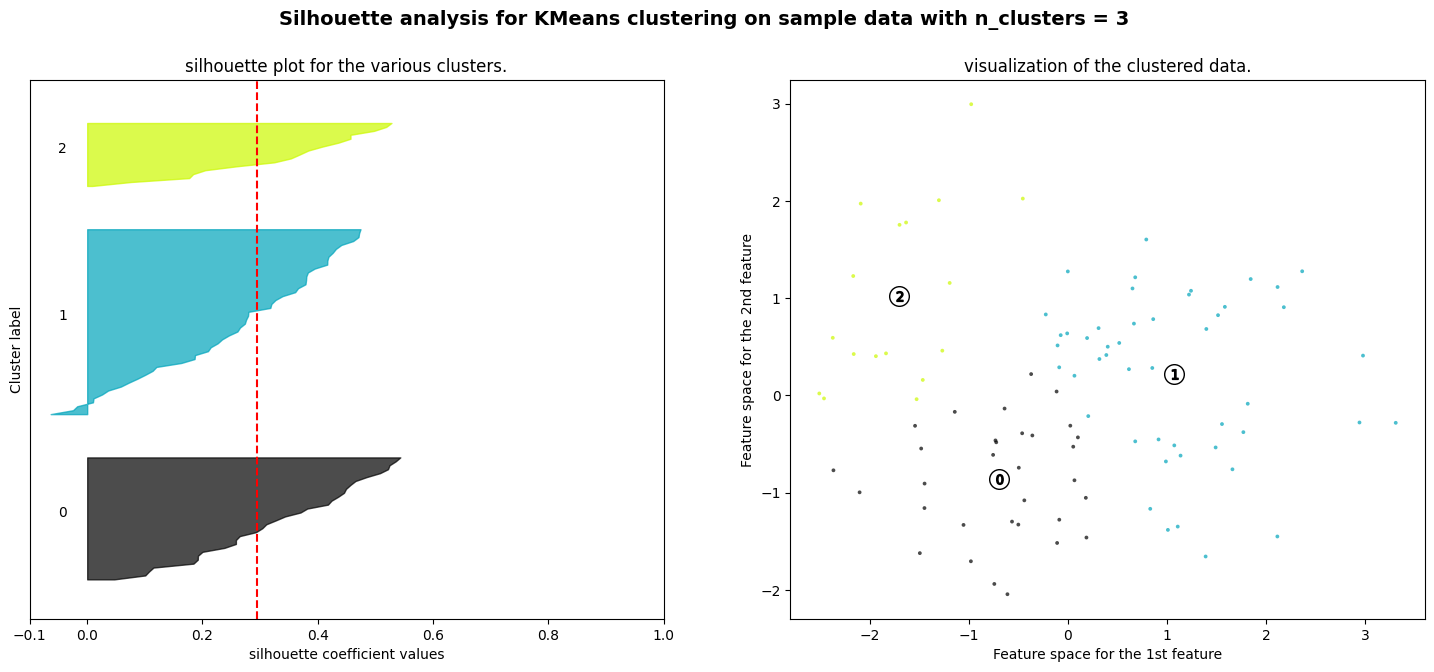

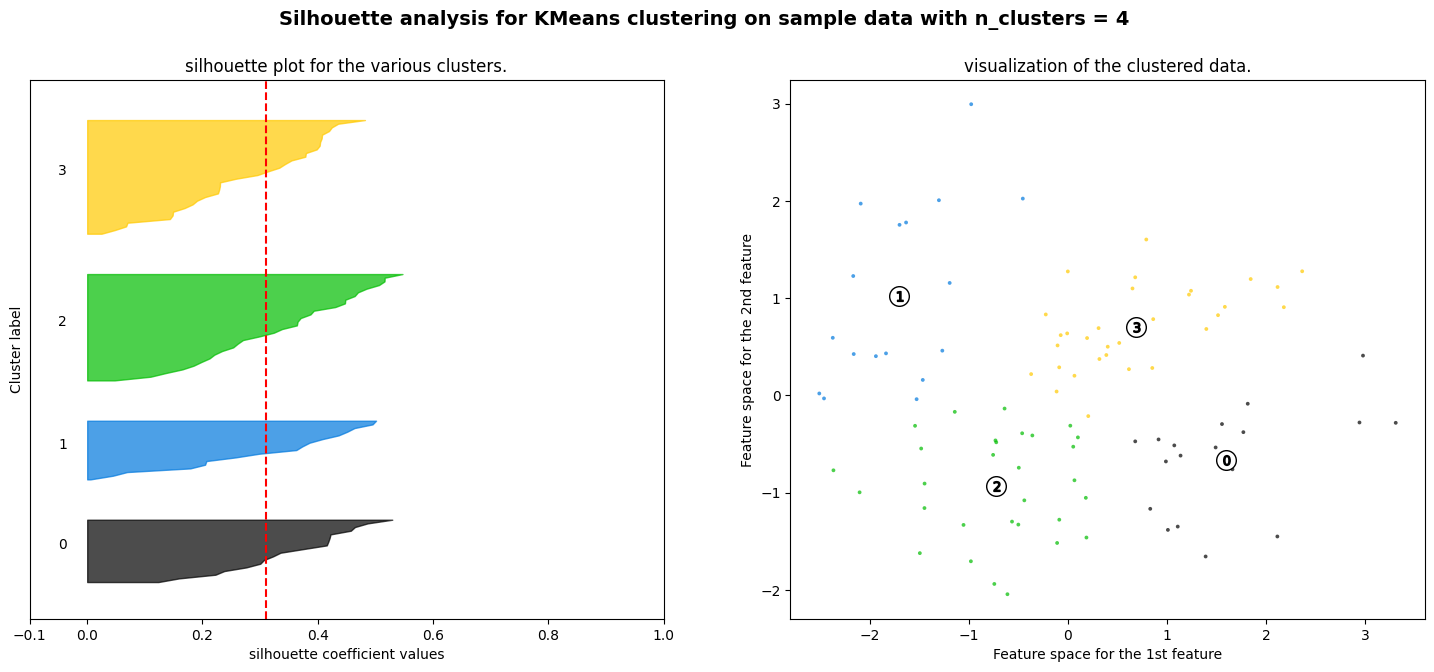

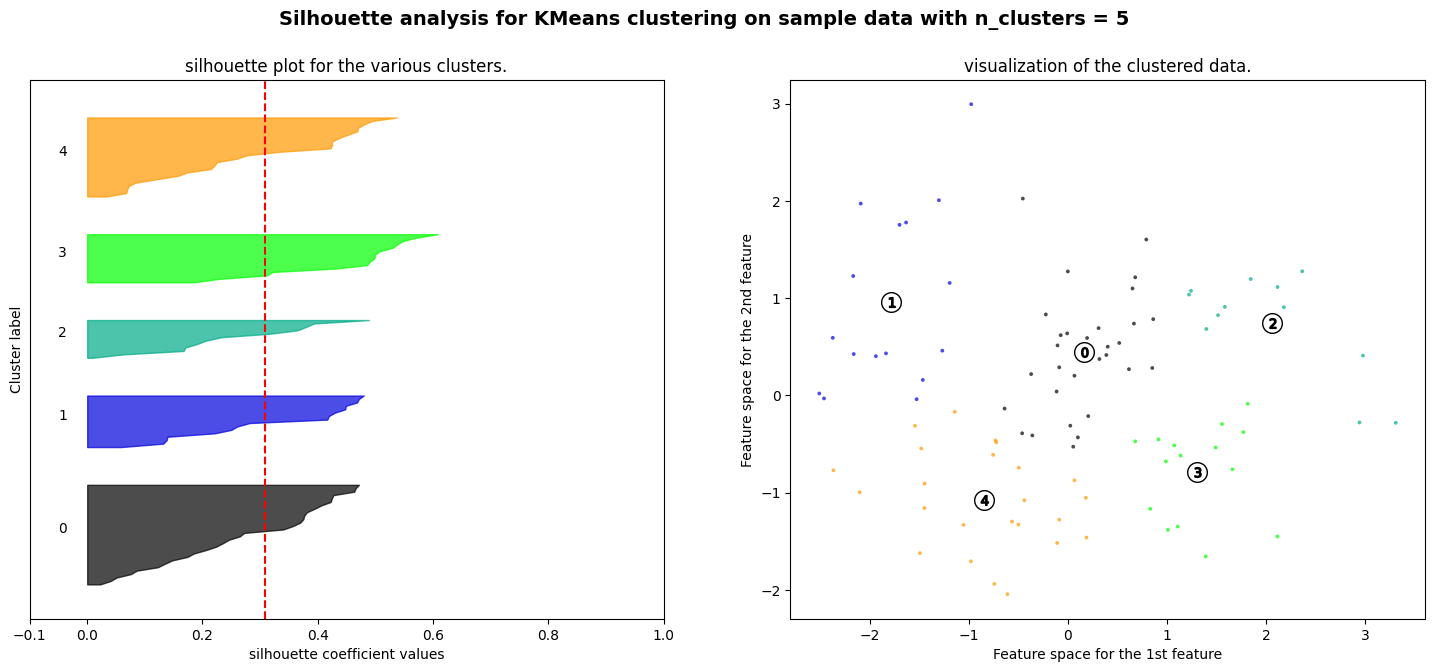

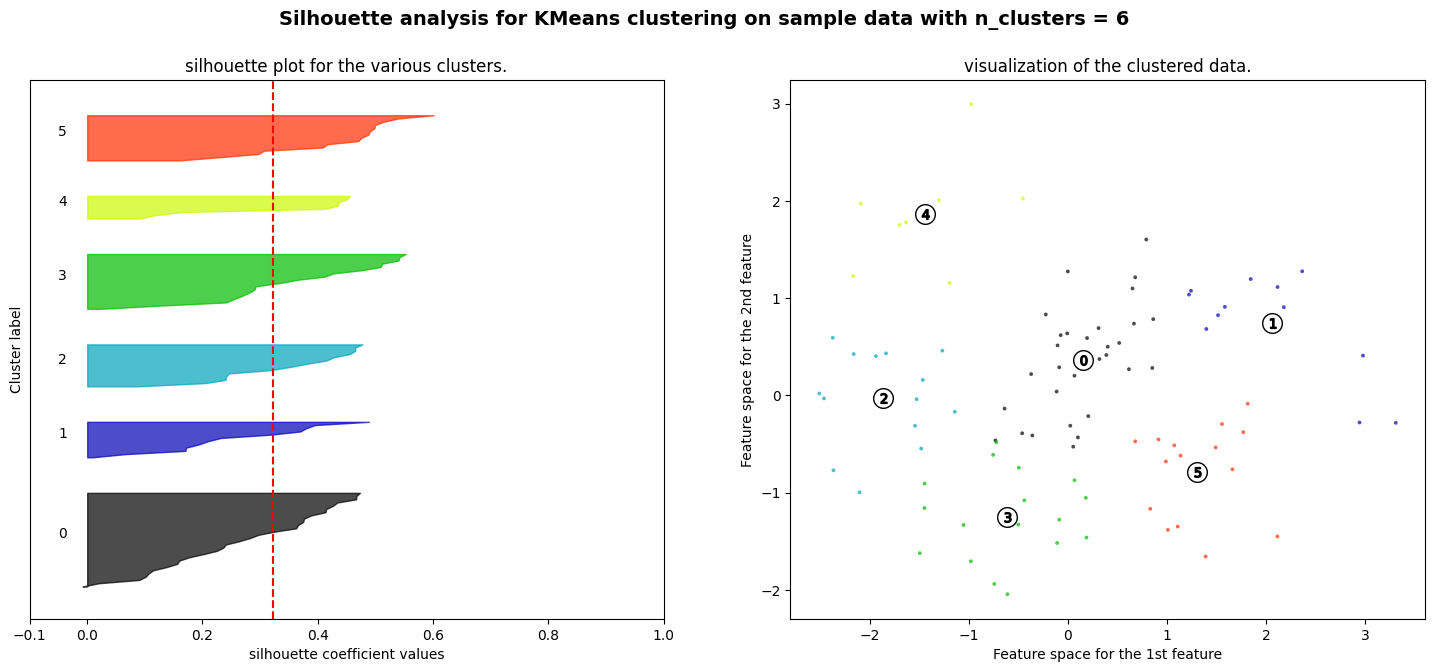

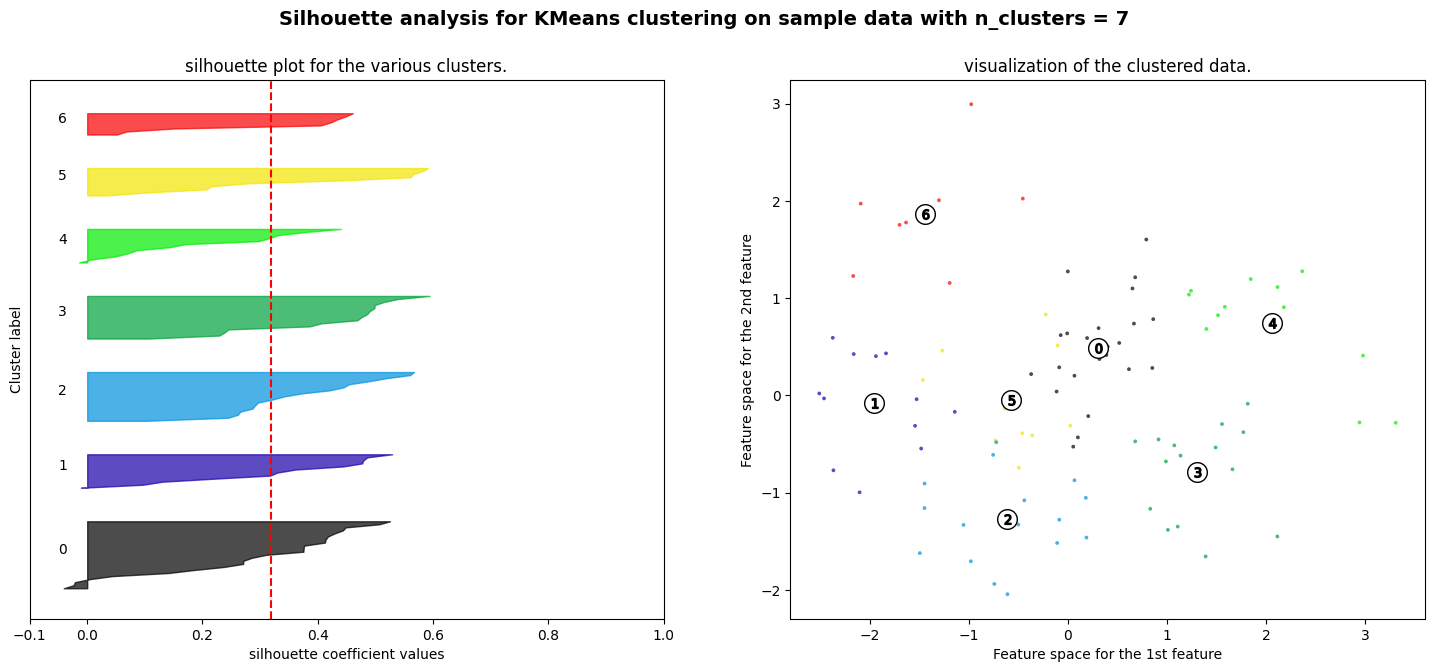

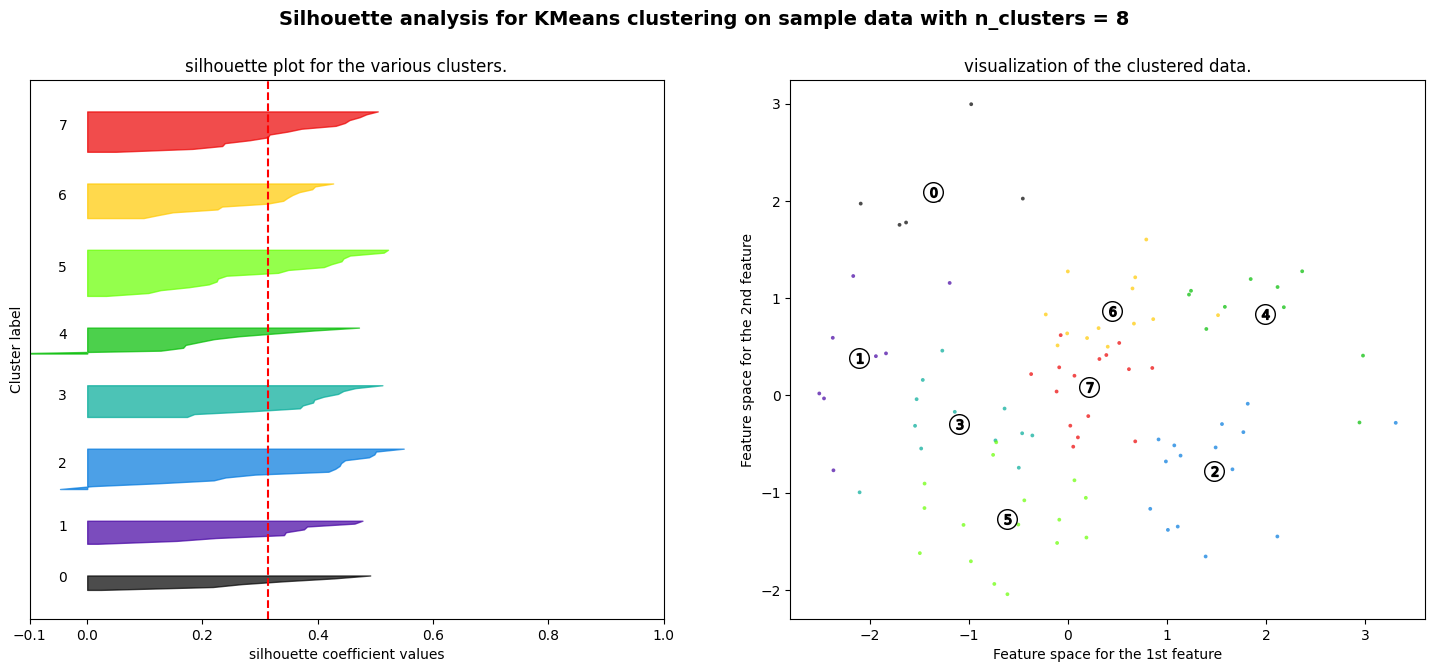

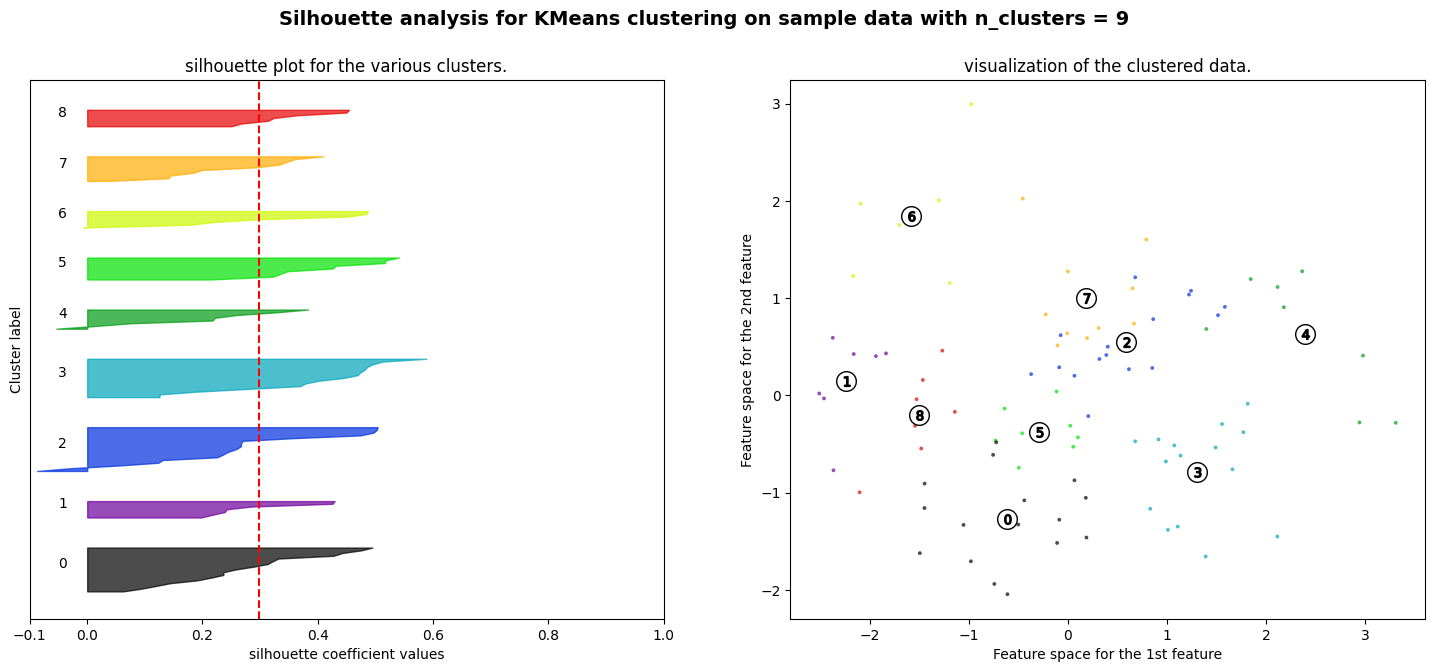

In [ ]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

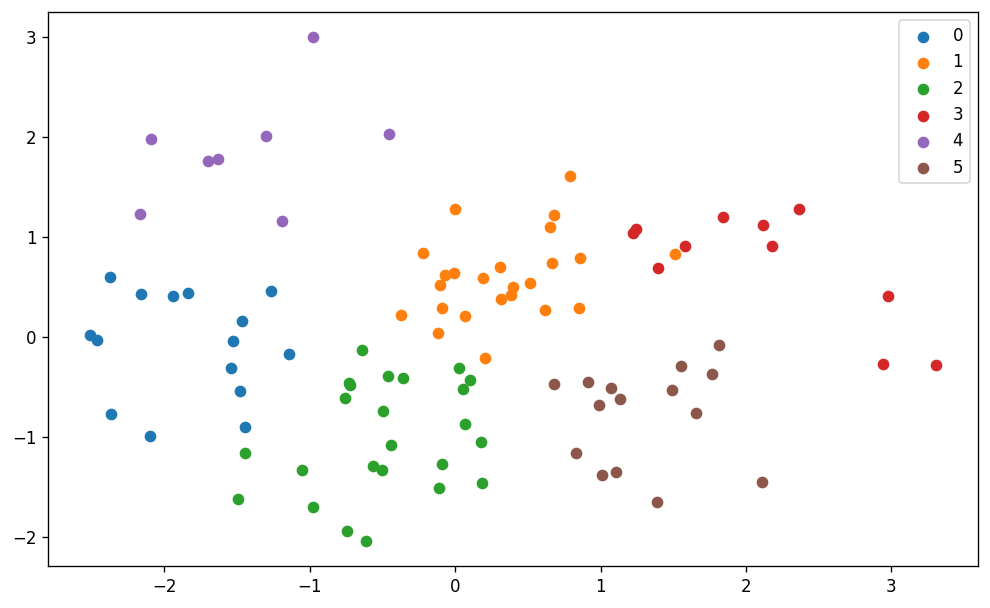

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
Deli 9 Bistro,-0.073217,0.619132,0.412799,1
The Glass Onion,-1.526635,-0.039340,-0.175766,0


In [ ]:
# joining clusters
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Aromas@11SIX,6.621406,3.46,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Mustang Terrace Lounge,7.170888,3.31,5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [ ]:
# back to normal from log during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Karachi Bakery,500.0,3.80,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
The Lal Street - Bar Exchange,1300.0,3.45,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = meta_df[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6,0
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3,4
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.0,4.66,4,4
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.0,3.21,5,2
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.0,4.34,5,0


In [ ]:
# counting cluster observations
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,Total_Restaurant,count
2,0,15
1,1,24
0,2,24
4,3,11
5,4,8
3,5,15


In [ ]:
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
3,Shah Ghouse Hotel & Restaurant,Chinese,800.0,3.21,5,2
60,Shree Santosh Dhaba Family Restaurant,Chinese,500.0,2.83,3,5
52,Diners Pavilion,Continental,1200.0,3.32,3,2
6,eat.fit,South Indian,500.0,3.20,4,2
35,Banana Leaf Multicuisine Restaurant,Biryani,700.0,3.69,5,2


In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 0 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Seafood' 'Goan' 'BBQ' 'Japanese' 'Italian'
 'Salad' 'Sushi' 'Spanish' 'Thai' 'Momos'] 

Cuisine List for Cluster : 4 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental' 'Sushi'] 

Cuisine List for Cluster : 2 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'American' 'Kebab' 'Italian' 'Finger Food'
 'Mexican' 'Salad' 'Bakery' 'Mughlai' 'Juices' 'Arabian' 'Andhra'
 'Hyderabadi' 'Thai' 'Indonesian' 'Asian' 'Momos' 'Desserts' 'Cafe'
 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 3 

['Lebanese' 'Ice Cream' 'Desserts' 'Fast Food' 'Asian' 'Beverages'
 'Bakery' 'Momos' 'Street Food' 'Arabian' 'North Indian'] 

Cuisine List for Cluster : 5 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'S

Here i have used Kmeans clustering ,ethod. As its not a data having hierarchical categories. So i choose kmeans.
ALso i have chosen K = 6 which gives maximum silhouette score.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

only n i used to tune. Which is done above.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes

### ML Model - 2

#### LDA

In [ ]:
!pip install lda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 9.7 MB/s eta 0:00:00
  Created wheel for lda: filename=lda-2.0.0-cp310-cp310-linux_x86_64.whl size=594246 sha256=aa7c50aacdba4def55890696e1b275ca214264a3ebf4b7e28c36342df016b09b
  Stored in directory: /root/.cache/pip/wheels/9d/32/fa/07fdf278a0b24269ce4d0be3d642c28dd0e888a4c5f2031279
Successfully built lda


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=6)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


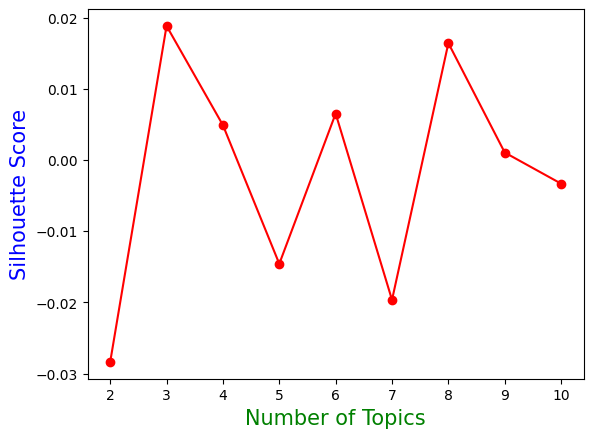

In [ ]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [ ]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook(local=True)

In [ ]:
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:,None]
doc_lengths = X_tfidf.sum(axis=1).getA1()
term_frequency = X_tfidf.sum(axis=0).getA1()
lda_doc_topic_dists = lda.transform(X)
doc_topic_dists = lda_doc_topic_dists / lda_doc_topic_dists.sum(axis=1)[:,None]
vocab = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# ploting the clusters top 30 terms
# lda_pyLDAvis = pyLDAvis.prepare(lda, X, vectorizer)
a = pyLDAvis.prepare(topic_term_dists,doc_topic_dists,doc_lengths,vocab,term_frequency)
pyLDAvis.display(a)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_sentiment_prediction = review_df[review_df.columns.to_list()].copy()
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour,Prediction
4693,Ulavacharu,Sridhar,The experience from the Jubilee Hills outlet l...,4.0,"12 Reviews , 9 Followers",2018-10-09 18:05:00,0,12,9.0,2018,10,18,3
6227,Shree Santosh Dhaba Family Restaurant,Yogesh,Worst quality and in veg biryani there is no a...,1.0,1 Review,2018-11-05 00:27:00,0,1,0.0,2018,11,0,3
6150,Prism Club & Kitchen,Akansha Chauhan,Super impressive ambience in this very spaciou...,5.0,"9 Reviews , 6 Followers",2019-03-06 16:01:00,0,9,6.0,2019,3,16,3
6032,PourHouse7,Ipsit Sahoo,Good place. Didn't really like the dj music bu...,4.0,"10 Reviews , 31 Followers",2019-04-11 11:15:00,0,10,31.0,2019,4,11,3
9670,Hyderabadi Daawat,The Fit Foodie 😋😎🤑,Nice little place for lunch parties. We were a...,4.0,"26 Reviews , 330 Followers",2018-11-15 13:25:00,1,26,330.0,2018,11,13,3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOP 100 WORDS FOR TOPIC #0


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


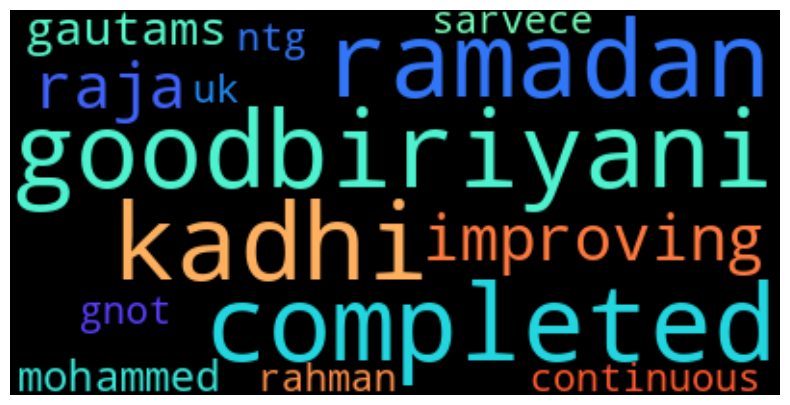

TOP 100 WORDS FOR TOPIC #1


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


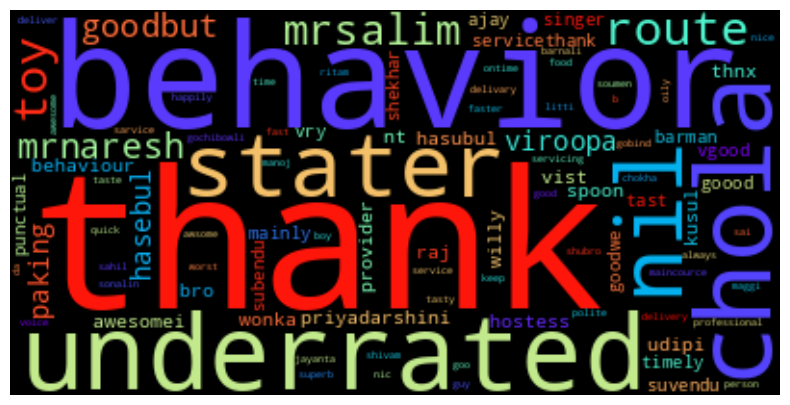

TOP 100 WORDS FOR TOPIC #2


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


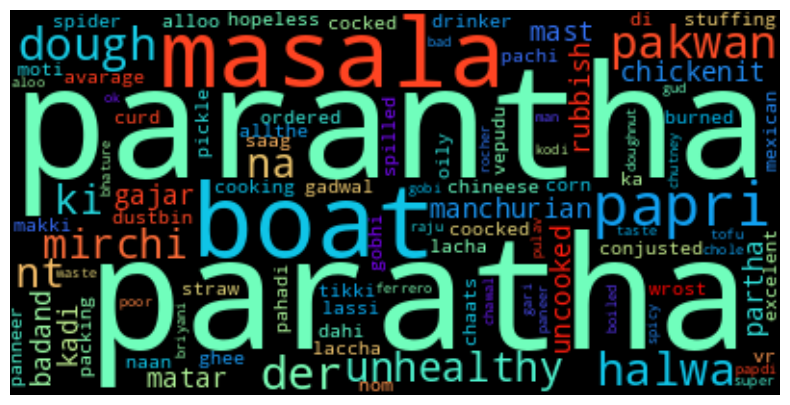

TOP 100 WORDS FOR TOPIC #3


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


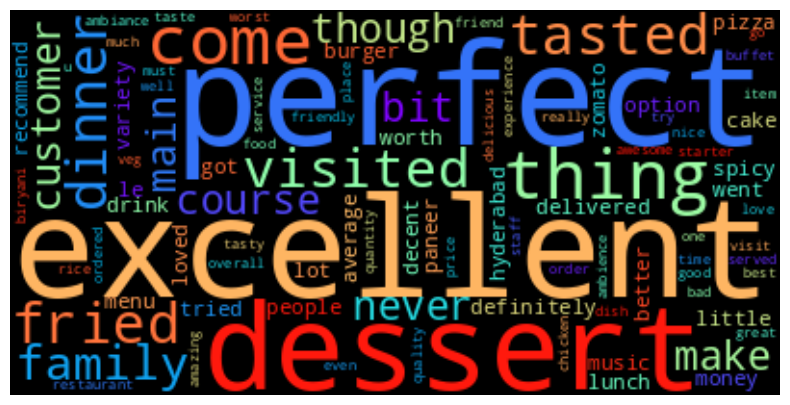

In [ ]:
from wordcloud import WordCloud
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [ ]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] ==
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  3 

Rating
5.0    3012
4.0    2239
1.0    1621
3.0    1106
2.0     629
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64
Prediction =  1 

Rating
5.0    603
4.0     93
1.0     39
3.0     32
2.0     18
Name: count, dtype: int64
Prediction =  0 

Rating
5.0    127
1.0     32
3.0     21
4.0     20
2.0     12
Name: count, dtype: int64
Prediction =  2 

Rating
5.0    84
1.0    43
3.0    33
2.0    25
4.0    21
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Supervised ML

In [ ]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#####Logistic and XGBoost algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
clf = LogisticRegression()
xgb = XGBClassifier()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# logitic regression GridSearchCV
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')
clf_grid.fit(X_train,y_train)
# XGBoost gridsearchCV
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)
xgb_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[14:43:32] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


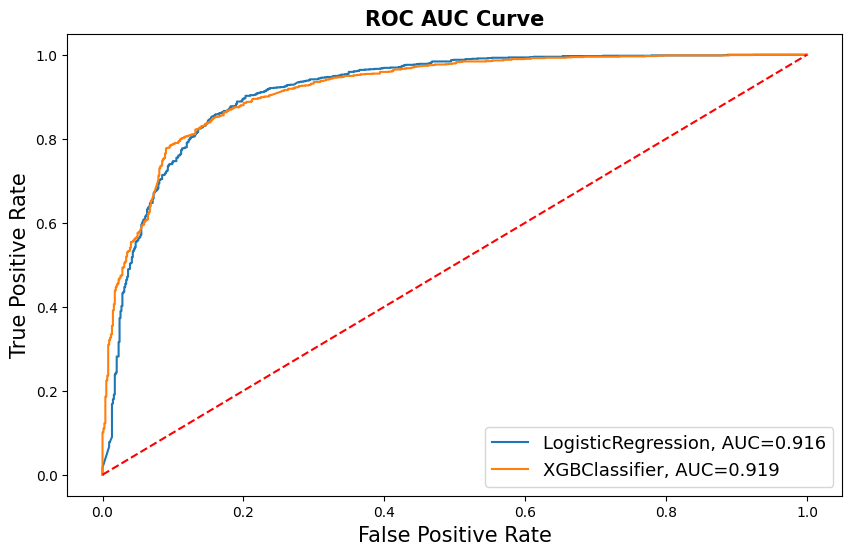

In [ ]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table._append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Here i have used gridsearch which is the most time consuming but it is the best optimizer. So it will have the best outcomes.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes a very good result achieved by this method.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

ROC AUC : It gives the probability of correct classification of a new observation. It will have more impact towards business.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

*
*


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***